In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


# Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
import re

# Load Dataset

**TRAIN SET**

In [3]:
df_train_trx = pd.read_csv('data/train_transaction.csv')

In [4]:
df_train_idt = pd.read_csv('data/train_identity.csv')

In [5]:
df_train_trx.shape

(590540, 394)

In [6]:
df_train_idt.shape

(144233, 41)

In [7]:
df_train = pd.merge(df_train_trx, df_train_idt, on='TransactionID', how='left')

In [8]:
df_train.shape

(590540, 434)

In [9]:
df_train.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


In [10]:
del df_train_trx, df_train_idt

**TEST SET**

In [11]:
df_test_trx = pd.read_csv('data/test_transaction.csv')

In [12]:
df_test_trx.shape

(506691, 393)

In [13]:
df_test_trx.head()

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,3663549,18403224,31.95,W,10409,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3663550,18403263,49.00,W,4272,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3663551,18403310,171.00,W,4476,574.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3663552,18403310,284.95,W,10989,360.0,150.0,visa,166.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3663553,18403317,67.95,W,18018,452.0,150.0,mastercard,117.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Since there is no target column `isFraud`, so there is one column fewer than the train set.

In [14]:
df_test_idt = pd.read_csv('data/test_identity.csv')

In [15]:
df_test_idt.shape

(141907, 41)

In [16]:
df_test_idt.head()

,TransactionID,id-01,id-02,id-03,id-04,id-05,id-06,id-07,id-08,id-09,...,id-31,id-32,id-33,id-34,id-35,id-36,id-37,id-38,DeviceType,DeviceInfo
0,3663586,-45.0,280290.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,...,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,MYA-L13 Build/HUAWEIMYA-L13
1,3663588,0.0,3579.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 67.0 for android,24.0,1280x720,match_status:2,T,F,T,T,mobile,LGLS676 Build/MXB48T
2,3663597,-5.0,185210.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,...,ie 11.0 for tablet,NaN,NaN,NaN,F,T,T,F,desktop,Trident/7.0
3,3663601,-45.0,252944.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,MYA-L13 Build/HUAWEIMYA-L13
4,3663602,-95.0,328680.0,NaN,NaN,7.0,-33.0,NaN,NaN,NaN,...,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,SM-G9650 Build/R16NW


In [17]:
df_test = pd.merge(df_test_trx, df_test_idt, on='TransactionID', how='left')

In [18]:
df_test.head()

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,id-31,id-32,id-33,id-34,id-35,id-36,id-37,id-38,DeviceType,DeviceInfo
0,3663549,18403224,31.95,W,10409,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3663550,18403263,49.00,W,4272,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3663551,18403310,171.00,W,4476,574.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3663552,18403310,284.95,W,10989,360.0,150.0,visa,166.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3663553,18403317,67.95,W,18018,452.0,150.0,mastercard,117.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Since there are column names that are not consistent with the train dataset, so adjust the column names accordingly.

In [19]:
df_test.columns.values

array(['TransactionID', 'TransactionDT', 'TransactionAmt', 'ProductCD',
       'card1', 'card2', 'card3', 'card4', 'card5', 'card6', 'addr1',
       'addr2', 'dist1', 'dist2', 'P_emaildomain', 'R_emaildomain', 'C1',
       'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11',
       'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7',
       'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'M1', 'M2',
       'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'V1', 'V2', 'V3', 'V4',
       'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14',
       'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23',
       'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32',
       'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41',
       'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50',
       'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59',
       'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68',
       

In [20]:
df_test.columns = df_test.columns.str.replace("-", "_")

In [21]:
df_test.head()

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,3663549,18403224,31.95,W,10409,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3663550,18403263,49.00,W,4272,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3663551,18403310,171.00,W,4476,574.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3663552,18403310,284.95,W,10989,360.0,150.0,visa,166.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3663553,18403317,67.95,W,18018,452.0,150.0,mastercard,117.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
del df_test_trx, df_test_idt

# Define Resuable Functions

In [23]:
## Function to return basic information of dataframe
def summarytable(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values
    summary['Missing_Percentage'] = np.round(df.isnull().sum().values/df.shape[0],2)
    summary['Uniques'] = df.nunique().values
    summary['Uniques_Percentage'] = np.round(df.nunique().values/df.shape[0],2)
    summary['First Value'] = df.loc[0].values
    summary['Second Value'] = df.loc[1].values
    summary['Third Value'] = df.loc[2].values
    summary['Last Value'] = df.iloc[-1].values

    return summary

## Function to reduce the DF size
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [24]:
def CalcOutliers(df_num): 

    # calculating mean and std of the array
    data_mean, data_std = np.mean(df_num), np.std(df_num)

    # seting the cut line to both higher and lower values
    # You can change this value
    cut = data_std * 3

    #Calculating the higher and lower cut values
    lower, upper = data_mean - cut, data_mean + cut

    # creating an array of lower, higher and total outlier values 
    outliers_lower = [x for x in df_num if x < lower]
    outliers_higher = [x for x in df_num if x > upper]
    outliers_total = [x for x in df_num if x < lower or x > upper]

    # array without outlier values
    outliers_removed = [x for x in df_num if x > lower and x < upper]
    
    print('Identified lowest outliers: %d' % len(outliers_lower)) # printing total number of values in lower cut of outliers
    print('Identified upper outliers: %d' % len(outliers_higher)) # printing total number of values in higher cut of outliers
    print('Total outlier observations: %d' % len(outliers_total)) # printing total number of values outliers of both sides
    print('Non-outlier observations: %d' % len(outliers_removed)) # printing total number of non outlier values
    print("Total percentual of Outliers: ", round((len(outliers_total) / len(outliers_removed) )*100, 4)) # Percentual of outliers in points
    
    return

In [25]:
# define plotting functions

# def count_plot(df, name1, name2='isFraud'):
#   count_df = df.groupby([str(name1), str(name2)])[str(name1)].count().unstack()
#   plt.figure()
#   count_df.plot(kind='barh', stacked=True)
#   plt.title(f'Counts across category {name1}')
#   plt.xlabel('Counts')
#   plt.show()

# def distribution_plot(df, name1, name2='isFraud'):
#   distribution_df = pd.crosstab(df[str(name1)], df[str(name2)], normalize='index')
#   plt.figure()
#   distribution_df.plot(kind='barh', stacked=True)
#   plt.title(f'Fraud distribution by {name1}')
#   plt.xlabel('% of fraud distribution')
#   plt.show()

def category_plot(df, name1, name2='isFraud'):
    count_df = df.groupby([str(name1), str(name2)])[str(name1)].count().unstack()
    distribution_df = pd.crosstab(df[str(name1)], df[str(name2)], normalize='index')
    my_colors=['cornflowerblue', 'lightsalmon']
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (14,4))
    count_df.plot(kind='barh', stacked=True, ax=axes[0], color=my_colors, title=f'Counts of category {name1}')
    distribution_df.plot(kind='barh', stacked=True, ax=axes[1], color=my_colors, title=f'Distribution of category {name1}')
    plt.legend()
    plt.tight_layout()
    plt.show()

def histplot(df, name1, name2='isFraud'):
    plt.figure(figsize=(7,3))
    sns.histplot(data=df[df[name2]==1], x=name1, label='Fraud', bins=20, kde=True, stat='probability', color='lightsalmon', edgecolor='white', alpha=0.5)
    sns.histplot(data=df[df[name2]==0], x=name1, label='Not Fraud', bins=20, kde=True, stat='probability', color='cornflowerblue', edgecolor='white', alpha=0.5)
    plt.title(f'Distribution of {name1}')
    plt.legend()
    plt.show()


## Reduce memory usage for dataframe

In [26]:
#df_train_trx = reduce_mem_usage(df_train_trx)

In [27]:
#df_train_idt = reduce_mem_usage(df_train_idt)

# Data Cleaning and Preprocessing

In [28]:
summary_train = summarytable(df_train)

# function reference: https://www.kaggle.com/code/kabure/baseline-fraud-detection-eda-interactive-views/notebook?scriptVersionId=17308287

Dataset Shape: (590540, 434)


In [29]:
# Understand datatypes, missing values, unique values etc.
summary_train[:20]

,Name,dtypes,Missing,Missing_Percentage,Uniques,Uniques_Percentage,First Value,Second Value,Third Value,Last Value
0,TransactionID,int64,0,0.00,590540,1.00,2987000,2987001,2987002,3577539
1,isFraud,int64,0,0.00,2,0.00,0,0,0,0
2,TransactionDT,int64,0,0.00,573349,0.97,86400,86401,86469,15811131
3,TransactionAmt,float64,0,0.00,20902,0.04,68.5,29.0,59.0,279.95
4,ProductCD,object,0,0.00,5,0.00,W,W,W,W
5,card1,int64,0,0.00,13553,0.02,13926,2755,4663,15066
6,card2,float64,8933,0.02,500,0.00,NaN,404.0,490.0,170.0
7,card3,float64,1565,0.00,114,0.00,150.0,150.0,150.0,150.0
8,card4,object,1577,0.00,4,0.00,discover,mastercard,visa,mastercard
9,card5,float64,4259,0.01,119,0.00,142.0,102.0,166.0,102.0


**NOTE**

- There is no duplicated transactions in the dataset, since the Uniques_Percentage for TransactionID is 100%.

## Missing Values

In [30]:
summary_train[summary_train['Missing_Percentage'] >= 0.8]

,Name,dtypes,Missing,Missing_Percentage,Uniques,Uniques_Percentage,First Value,Second Value,Third Value,Last Value
14,dist2,float64,552913,0.94,1751,0.00,NaN,NaN,NaN,NaN
36,D6,float64,517353,0.88,829,0.00,NaN,NaN,NaN,NaN
37,D7,float64,551623,0.93,597,0.00,NaN,NaN,NaN,NaN
38,D8,float64,515614,0.87,12353,0.02,NaN,NaN,NaN,NaN
39,D9,float64,515614,0.87,24,0.00,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
423,id_30,object,512975,0.87,75,0.00,NaN,NaN,NaN,NaN
425,id_32,float64,512954,0.87,4,0.00,NaN,NaN,NaN,NaN
426,id_33,object,517251,0.88,260,0.00,NaN,NaN,NaN,NaN
427,id_34,object,512735,0.87,4,0.00,NaN,NaN,NaN,NaN


In [31]:
summary_train[summary_train['Missing_Percentage'] >= 0.8]['Name'].values

array(['dist2', 'D6', 'D7', 'D8', 'D9', 'D12', 'D13', 'D14', 'V138',
       'V139', 'V140', 'V141', 'V142', 'V143', 'V144', 'V145', 'V146',
       'V147', 'V148', 'V149', 'V150', 'V151', 'V152', 'V153', 'V154',
       'V155', 'V156', 'V157', 'V158', 'V159', 'V160', 'V161', 'V162',
       'V163', 'V164', 'V165', 'V166', 'V322', 'V323', 'V324', 'V325',
       'V326', 'V327', 'V328', 'V329', 'V330', 'V331', 'V332', 'V333',
       'V334', 'V335', 'V336', 'V337', 'V338', 'V339', 'id_03', 'id_04',
       'id_07', 'id_08', 'id_09', 'id_10', 'id_14', 'id_18', 'id_21',
       'id_22', 'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_30',
       'id_32', 'id_33', 'id_34', 'DeviceInfo'], dtype=object)

In [32]:
top_missing_columns = summary_train[summary_train['Missing_Percentage'] >= 0.8]['Name'].values

**NOTE**

There are 75 columns that have missing values greater and equal than 80%. So, dropping these columns for further processing.

### Drop columns that have large amount of missing values

In [33]:
df_train.drop(columns=top_missing_columns, inplace=True)

In [34]:
df_train.shape

(590540, 359)

In [35]:
df_test.drop(columns=top_missing_columns, inplace=True)

In [36]:
df_test.shape

(506691, 358)

In [37]:
# summary table after column drop

summary = summarytable(df_train)

Dataset Shape: (590540, 359)


In [38]:
summary.head()

,Name,dtypes,Missing,Missing_Percentage,Uniques,Uniques_Percentage,First Value,Second Value,Third Value,Last Value
0,TransactionID,int64,0,0.0,590540,1.00,2987000,2987001,2987002,3577539
1,isFraud,int64,0,0.0,2,0.00,0,0,0,0
2,TransactionDT,int64,0,0.0,573349,0.97,86400,86401,86469,15811131
3,TransactionAmt,float64,0,0.0,20902,0.04,68.5,29.0,59.0,279.95
4,ProductCD,object,0,0.0,5,0.00,W,W,W,W


# EDA

## Target Variable Distribution

In [40]:
df_train['isFraud'].value_counts(normalize=True)

0    0.96501
1    0.03499
Name: isFraud, dtype: float64

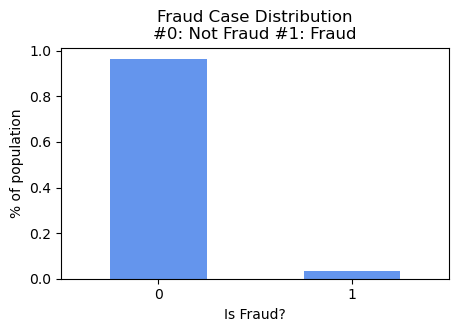

In [42]:
# understand the target variable `isFraud` distribution

plt.figure(figsize=(5, 3))
df_train['isFraud'].value_counts(normalize=True).plot(kind='bar', color='cornflowerblue')
plt.ylabel('% of population')
plt.xlabel('Is Fraud?')
plt.title('Fraud Case Distribution\n#0: Not Fraud #1: Fraud')
plt.xticks(rotation=360)
plt.show()

There is significant imbalance between two classes, potential problem to address for modeling later.

## TransactionDT

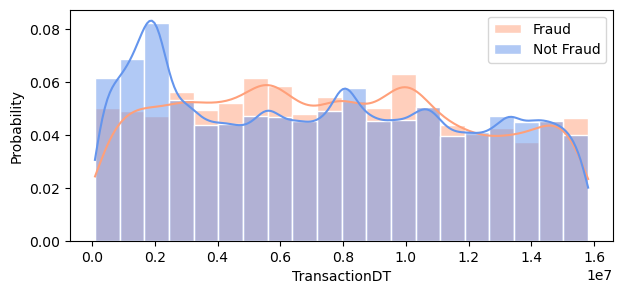

In [70]:
# plot the probability distribution of transactionDF for both fraud and not fruad cases
histplot(df_train, 'TransactionDT')

## Transaction Amount

In [43]:
df_train['TransactionAmt'].sum()

79738948.735

In [51]:
df_train['TransactionAmt'].describe()

count    590540.000000
mean        135.027176
std         239.162522
min           0.251000
25%          43.321000
50%          68.769000
75%         125.000000
max       31937.391000
Name: TransactionAmt, dtype: float64

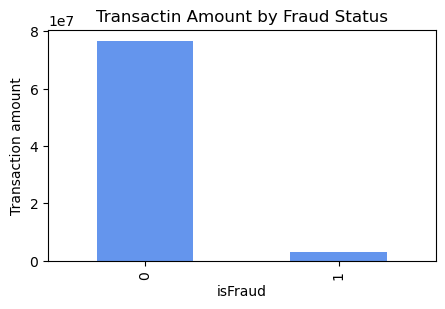

In [44]:
plt.figure(figsize=(5,3))
df_train.groupby('isFraud')['TransactionAmt'].sum().plot(kind='bar', color='cornflowerblue')
plt.ylabel('Transaction amount')
plt.title('Transactin Amount by Fraud Status')
plt.show()

In [50]:
df_train.groupby('isFraud')['TransactionAmt'].quantile([0.01, 0.1, 0.25, 0.5, 0.75, 0.9, 0.99]).unstack()

,0.01,0.10,0.25,0.50,0.75,0.90,0.99
isFraud,,,,,,,
0,9.51288,26.310,43.970,68.5,120.0,267.112,1104.0
1,6.74096,18.936,35.044,75.0,161.0,335.000,994.0


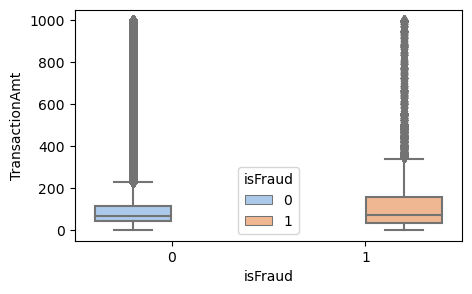

In [46]:
plt.figure(figsize=(5,3))
sns.boxplot(x="isFraud", y="TransactionAmt", data=df_train[df_train['TransactionAmt']<=1000], hue='isFraud', palette='pastel');

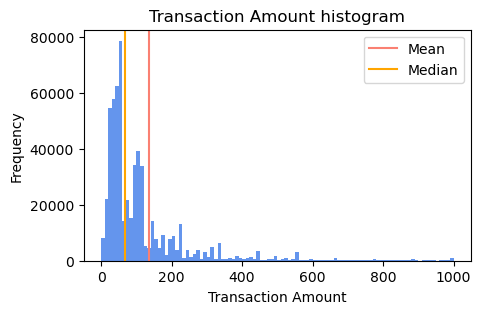

In [49]:
# plot the distribution of transaction amount

plt.figure(figsize=(5, 3))
plt.hist(df_train[df_train['TransactionAmt']<=1000]['TransactionAmt'].values, color='cornflowerblue', bins=100)
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.title('Transaction Amount histogram')
plt.axvline(df_train['TransactionAmt'].mean(), c='salmon', label='Mean')
plt.axvline(df_train['TransactionAmt'].median(), c='orange', label='Median')
plt.legend()
plt.show()

In [54]:
CalcOutliers(df_train['TransactionAmt'])

Identified lowest outliers: 0
Identified upper outliers: 10093
Total outlier observations: 10093
Non-outlier observations: 580447
Total percentual of Outliers:  1.7388


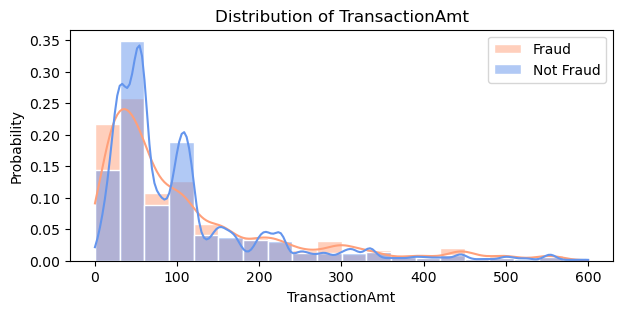

In [73]:
histplot(df_train[df_train['TransactionAmt']<=600], 'TransactionAmt')

**NOTE**

- Majority of the transaction amount is between 0 to 200, and average is ~135
- Transaction amount is heavily right skewed, with max amount over 30K
- The majority of Fraud cases with values relatively smaller that is between 0 - 100


## ProductCD

In [57]:
df_train.groupby(['ProductCD', 'isFraud'])['ProductCD'].count().unstack()

isFraud,0,1
ProductCD,,
C,60511,8008
H,31450,1574
R,36273,1426
S,10942,686
W,430701,8969


In [58]:
df_test = df_train.groupby(['ProductCD', 'isFraud'])['ProductCD'].count().unstack()

<AxesSubplot: ylabel='ProductCD'>

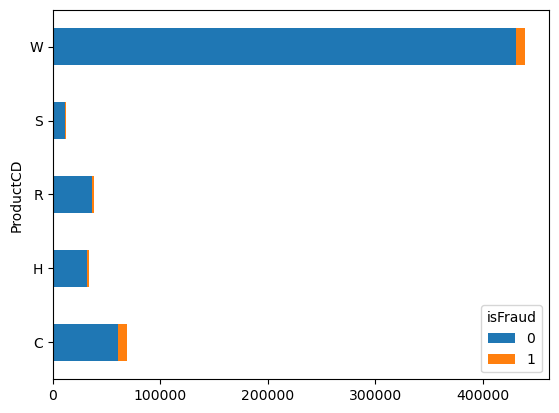

In [59]:
df_test.plot(kind='barh', stacked=True)

<AxesSubplot: xlabel='ProductCD'>

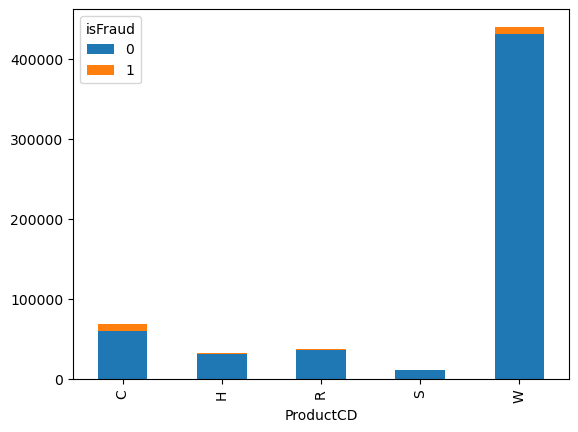

In [62]:
df_train.groupby(['ProductCD', 'isFraud'])['ProductCD'].count().unstack().plot(kind='bar', stacked=True)

<AxesSubplot: xlabel='ProductCD', ylabel='count'>

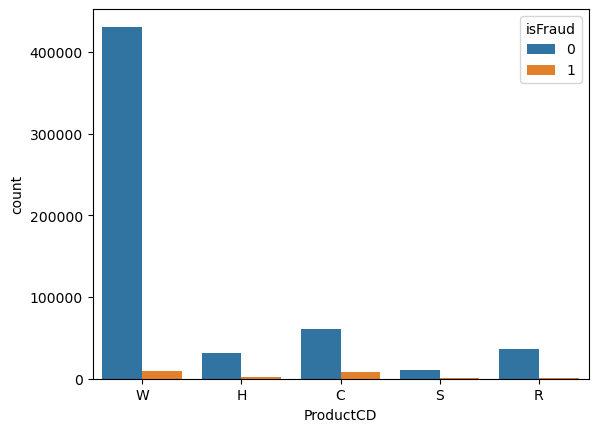

In [63]:
sns.countplot(x='ProductCD', hue='isFraud', data=df_train)

In [27]:
productCD_df = df_train_trx.groupby(['ProductCD', 'isFraud'])['ProductCD'].count()/df_train_trx.groupby('ProductCD')['ProductCD'].count()

productCD_df = productCD_df.unstack()

In [28]:
productCD_df

isFraud,0,1
ProductCD,,
C,0.883127,0.116873
H,0.952338,0.047662
R,0.962174,0.037826
S,0.941004,0.058996
W,0.979601,0.020399


In [29]:
pd.crosstab(df_train_trx['ProductCD'], df_train_trx['isFraud'], normalize='index')*100

isFraud,0,1
ProductCD,,
C,88.312731,11.687269
H,95.233769,4.766231
R,96.217406,3.782594
S,94.100447,5.899553
W,97.960061,2.039939


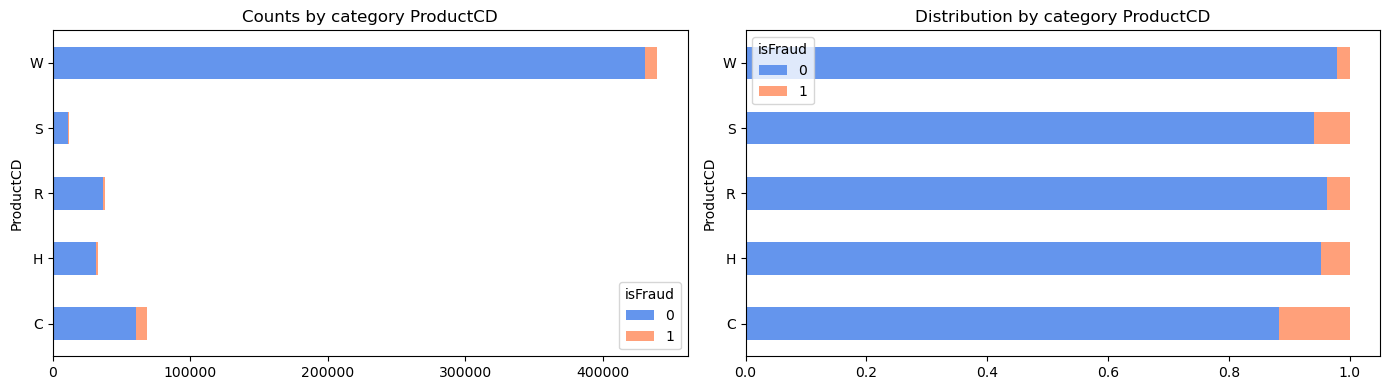

In [64]:
category_plot(df_train, 'ProductCD')

**NOTE**

- Majority of the ProductCD type is W, accounts for over 74% of the data points
- Among the five products, product C has the highest percentage of Fraud

## Card Columns

### Categorical columns - card 4 & card 6

In [67]:
# check column information

summary.loc[summary['Name'].str.startswith('card'), :]

,Name,dtypes,Missing,Missing_Percentage,Uniques,Uniques_Percentage,First Value,Second Value,Third Value,Last Value
5,card1,int64,0,0.00,13553,0.02,13926,2755,4663,15066
6,card2,float64,8933,0.02,500,0.00,NaN,404.0,490.0,170.0
7,card3,float64,1565,0.00,114,0.00,150.0,150.0,150.0,150.0
8,card4,object,1577,0.00,4,0.00,discover,mastercard,visa,mastercard
9,card5,float64,4259,0.01,119,0.00,142.0,102.0,166.0,102.0
10,card6,object,1571,0.00,4,0.00,credit,credit,debit,credit


**NOTE**

Overall, these 6 columns contains information about purchaser's card info
- the missing values are minimal

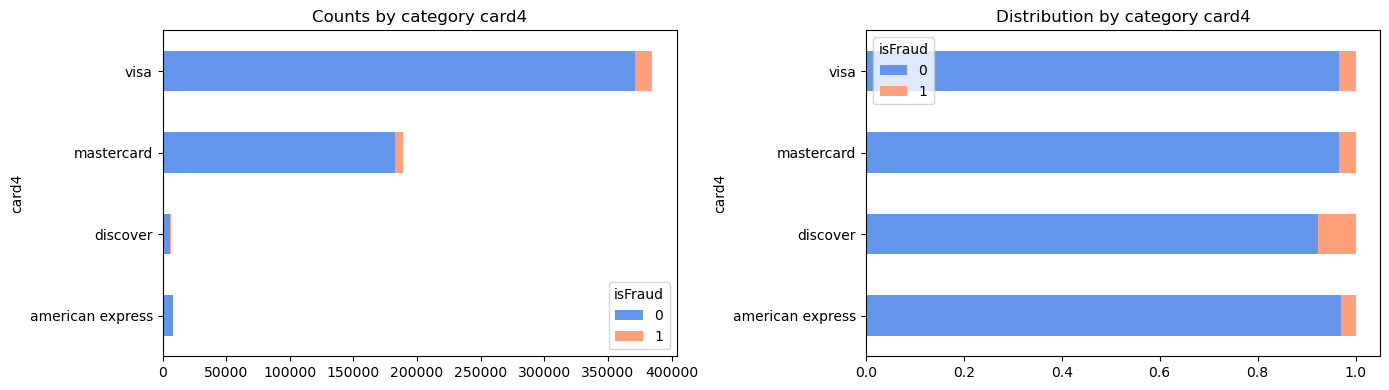

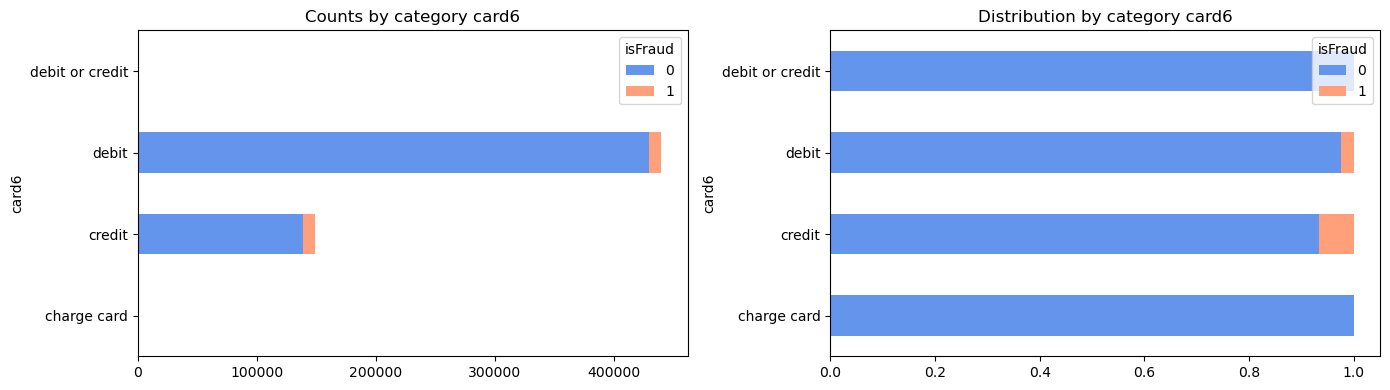

In [65]:
for i in [4, 6]:
    category_plot(df_train, 'card'+str(i), 'isFraud')

**Note**:
- majority of card types are debit(75%) and credit cards(25%).
- around 2/3 of the cards are issued by Visa and close to 1/3 are issued by Mastercard
- among different card types, credit card has the highest rate of fraud, while cards issued by discover with high fraud rate as well


### Numeric card columns - 1, 2, 3 & 5

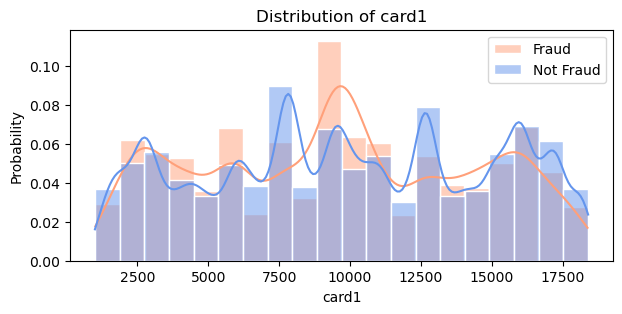

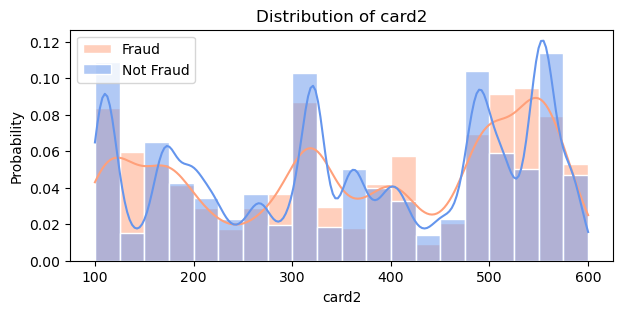

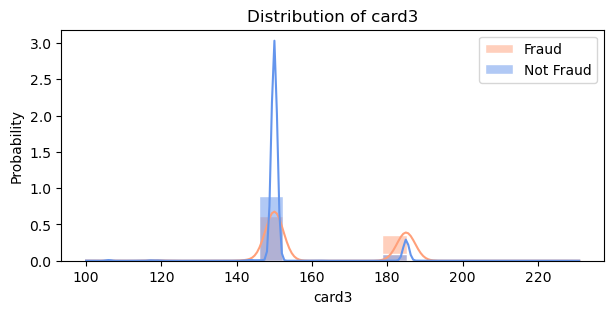

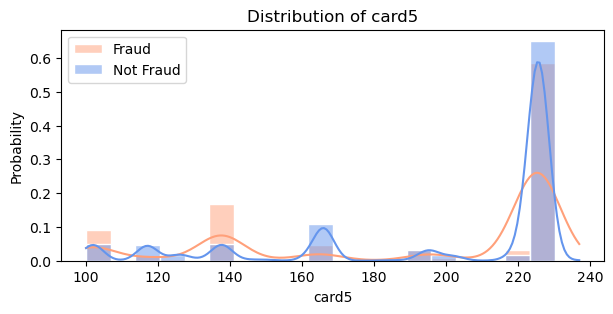

In [74]:
for i in [1, 2, 3, 5]:
    histplot(df_train, 'card'+str(i))

In [62]:
df_train.loc[:, df_train.columns.str.startswith('card')].describe()

,card1,card2,card3,card5
count,590540.000000,581607.000000,588975.000000,586281.000000
mean,9898.734658,362.555488,153.194925,199.278897
std,4901.170153,157.793246,11.336444,41.244453
min,1000.000000,100.000000,100.000000,100.000000
25%,6019.000000,214.000000,150.000000,166.000000
50%,9678.000000,361.000000,150.000000,226.000000
75%,14184.000000,512.000000,150.000000,226.000000
max,18396.000000,600.000000,231.000000,237.000000


**Note**

- card1 values spread from 1000 to 18396, with highest proportion of fraud cases in range 9000 to 10k
- card2 with min value of 100 to max 600, with higher proportion of fraud in 150 and 500-550
- card3 values mainly around 150 with some values of ~180
- card5 majority value is 226, also there's a peak around value of 140 for fraud cases


In [70]:
df_train['card3'].value_counts()

150.0    521287
185.0     56346
106.0      1571
144.0      1252
146.0      1252
          ...  
224.0         1
199.0         1
221.0         1
209.0         1
173.0         1
Name: card3, Length: 114, dtype: int64

In [71]:
df_train['card5'].value_counts()

226.0    296546
224.0     81513
166.0     57140
102.0     29105
117.0     25941
          ...  
221.0         1
167.0         1
115.0         1
165.0         1
234.0         1
Name: card5, Length: 119, dtype: int64

## Address

In [68]:
summary[:20]

,Name,dtypes,Missing,Missing_Percentage,Uniques,Uniques_Percentage,First Value,Second Value,Third Value,Last Value
0,TransactionID,int64,0,0.00,590540,1.00,2987000,2987001,2987002,3577539
1,isFraud,int64,0,0.00,2,0.00,0,0,0,0
2,TransactionDT,int64,0,0.00,573349,0.97,86400,86401,86469,15811131
3,TransactionAmt,float64,0,0.00,20902,0.04,68.5,29.0,59.0,279.95
4,ProductCD,object,0,0.00,5,0.00,W,W,W,W
5,card1,int64,0,0.00,13553,0.02,13926,2755,4663,15066
6,card2,float64,8933,0.02,500,0.00,NaN,404.0,490.0,170.0
7,card3,float64,1565,0.00,114,0.00,150.0,150.0,150.0,150.0
8,card4,object,1577,0.00,4,0.00,discover,mastercard,visa,mastercard
9,card5,float64,4259,0.01,119,0.00,142.0,102.0,166.0,102.0


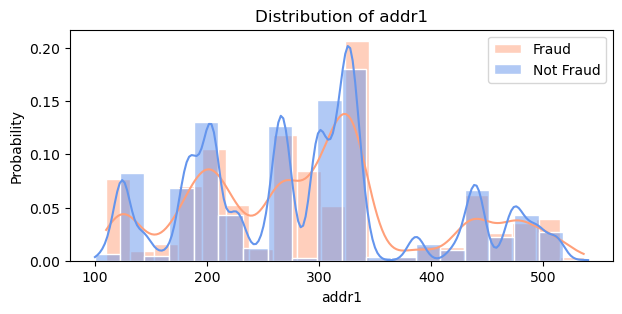

In [69]:
histplot(df_train, 'addr1')

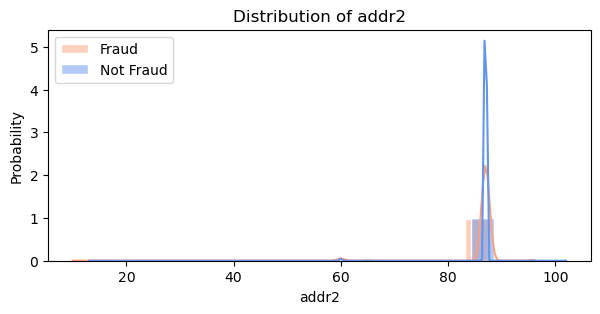

In [72]:
histplot(df_train, 'addr2')

In [1]:
df_train['addr2'].value_counts()

NameError: name 'df_train' is not defined